In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [6]:
# Split the 'title' column into words and convert to lowercase
car_df['title'].str.lower().str.split()

0          [skoda, fabia]
1       [vauxhall, corsa]
2          [hyundai, i30]
3           [mini, hatch]
4       [vauxhall, corsa]
              ...        
3682    [renault, megane]
3683           [audi, a4]
3684     [bmw, 3, series]
3685      [honda, accord]
3686    [vauxhall, corsa]
Name: title, Length: 3687, dtype: object

In [7]:
pd.merge(car_df, brand_df, left_on='title', right_on='title', how='left')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,NaN
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,NaN


In [8]:
# Example: replace all spaces with underscores in the 'title' column (after lowering case)
car_df['title'].str.lower().str.replace(' ', '_')

0          skoda_fabia
1       vauxhall_corsa
2          hyundai_i30
3           mini_hatch
4       vauxhall_corsa
             ...      
3682    renault_megane
3683           audi_a4
3684      bmw_3_series
3685      honda_accord
3686    vauxhall_corsa
Name: title, Length: 3687, dtype: object



아래는 첨부하신 코드의 각 셀별 동작과 의미를 최대한 상세하게 설명한 내용입니다.

---

### 1. 라이브러리 불러오기
```python
import pandas as pd
import numpy as np
import seaborn as sns
```
- **pandas(pd):** 데이터프레임(표 형태 데이터) 처리와 분석을 위한 대표적인 파이썬 라이브러리입니다.
- **numpy(np):** 수치 계산과 배열(행렬) 연산을 빠르게 처리할 수 있는 라이브러리입니다.
- **seaborn(sns):** 데이터 시각화(그래프 그리기)를 쉽게 해주는 라이브러리입니다.

---

### 2. 자동차 데이터 불러오기
```python
car_df = pd.read_csv('cars.csv')
```
- 현재 폴더에 있는 `cars.csv` 파일을 읽어서 **car_df**라는 데이터프레임으로 저장합니다.
- 이 데이터에는 자동차의 이름, 가격, 연식 등 다양한 정보가 들어 있을 수 있습니다.

---

### 3. 브랜드 데이터 불러오기
```python
brand_df = pd.read_csv('brand.csv')
```
- 현재 폴더에 있는 `brand.csv` 파일을 읽어서 **brand_df**라는 데이터프레임으로 저장합니다.
- 이 데이터에는 자동차 브랜드의 이름, 국가, 등급 등 브랜드 관련 정보가 들어 있을 수 있습니다.

---

### 4. car_df 데이터 미리보기
```python
car_df.head()
```
- car_df의 **처음 5개 행**을 출력해서 데이터가 잘 불러와졌는지, 어떤 컬럼이 있는지, 값이 어떻게 생겼는지 미리 확인합니다.

---

### 5. brand_df 데이터 미리보기
```python
brand_df.head()
```
- brand_df의 **처음 5개 행**을 출력해서 브랜드 데이터의 구조와 내용을 미리 확인합니다.

---

### 6. 'title' 열을 소문자로 바꾸고 단어별로 분리
```python
car_df['title'].str.lower().str.split()
```
- car_df의 'title' 열(자동차 이름 등)에 대해,
  - **str.lower()**: 모든 글자를 소문자로 변환합니다. (예: 'Sonata' → 'sonata')
  - **str.split()**: 문자열을 공백 기준으로 나누어 리스트로 만듭니다. (예: 'hyundai sonata' → ['hyundai', 'sonata'])
- 이 코드는 실제로 데이터프레임에 저장하지 않고, 변환된 결과만 일시적으로 보여줍니다.

---

### 7. car_df와 brand_df를 'title' 기준으로 병합
```python
pd.merge(car_df, brand_df, left_on='title', right_on='title', how='left')
```
- car_df와 brand_df를 **'title'** 컬럼을 기준으로 합칩니다.
- **how='left'**: car_df의 모든 행을 기준으로, brand_df에서 일치하는 'title'이 있으면 해당 정보를 붙여줍니다.  
  (car_df에만 있는 title은 그대로 남고, brand_df에만 있는 title은 결과에 포함되지 않습니다.)
- 이 코드는 병합된 결과를 일시적으로 보여주며, 변수에 저장하지는 않습니다.

---

### 8. 'title' 열을 소문자로 바꾸고, 공백을 언더스코어로 변경
```python
car_df['title'].str.lower().str.replace(' ', '_')
```
- car_df의 'title' 열에 대해,
  - **str.lower()**: 모든 글자를 소문자로 변환합니다.
  - **str.replace(' ', '_')**: 문자열 내의 모든 공백을 언더스코어(_)로 바꿉니다.  
    (예: 'Hyundai Sonata' → 'hyundai_sonata')
- 이 코드는 실제로 데이터프레임에 저장하지 않고, 변환된 결과만 일시적으로 보여줍니다.

---

## 요약
- **데이터 불러오기**: 자동차와 브랜드 데이터를 각각 읽어옵니다.
- **데이터 미리보기**: head()로 데이터 구조를 확인합니다.
- **문자열 전처리**: 자동차 이름(title)을 소문자로 바꾸고, 단어별로 분리하거나, 공백을 언더스코어로 바꿉니다.
- **데이터 병합**: 자동차 데이터와 브랜드 데이터를 'title' 컬럼을 기준으로 합쳐서, 한 번에 다양한 정보를 볼 수 있게 합니다.

이런 전처리와 병합 과정은 데이터 분석, 머신러닝, 시각화 등 다양한 데이터 작업의 기본이 되는 중요한 단계입니다.

In [9]:
# Check for missing values in each row
car_df.isnull().sum(axis=1)

# Example: replace all spaces with underscores in the 'title' column (after lowering case)
car_df['title'] = car_df['title'].str.lower().str.replace(' ', '_')

In [10]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [11]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda_fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,vauxhall_corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai_i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,mini_hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall_corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [13]:
car_df.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

아래는 `car_df.info()` 코드 줄 이후부터 마지막까지 각 코드의 상세한 설명입니다.

---

### 1. 결측치(누락값) 개수 확인  
```python
car_df.isnull().sum()
```
- **설명:**  
  - car_df 데이터프레임의 각 열(컬럼)별로 결측치(값이 없는 셀, NaN)의 개수를 셉니다.
  - 예를 들어, 'price' 열에 결측치가 2개 있으면, 결과에 2가 표시됩니다.
  - 데이터의 누락 정도를 파악할 때 사용합니다.

---

### 2. 결측치 비율(%) 확인  
```python
car_df.isnull().mean()*100
```
- **설명:**  
  - 각 열별 결측치의 비율(%)을 계산합니다.
  - `isnull().mean()`은 결측치가 차지하는 비율(0~1)을 반환하고, 여기에 100을 곱해 %로 만듭니다.
  - 예를 들어, 전체 100개 중 5개가 결측치면 5.0이 나옵니다.

---

### 3. 'Service history' 열의 결측치를 'unknown'으로 채우기  
```python
car_df['Service history'] = car_df['Service history'].fillna('unknown')
car_df.isnull().sum(axis=1)
missing_threshold_per_row = 3
initial_rows = len(car_df)
```
- **설명:**  
  - `fillna('unknown')`은 'Service history' 열에서 결측치(NaN)를 'unknown'이라는 문자열로 대체합니다.
  - `car_df.isnull().sum(axis=1)`은 각 행(자동차 한 대 정보)별로 결측치가 몇 개인지 셉니다.
  - `missing_threshold_per_row = 3`은 한 행에 결측치가 3개 이상이면 삭제 기준으로 삼겠다는 의미입니다.
  - `initial_rows = len(car_df)`는 데이터프레임의 원래 행 개수를 저장해둡니다(삭제 전 비교용).

---

### 4. 결측치가 많은 행 제거  
```python
df_cleaned = car_df[car_df.isnull().sum(axis=1) < missing_threshold_per_row].copy()
```
- **설명:**  
  - 각 행별 결측치 개수가 `missing_threshold_per_row`(여기선 3) 미만인 행만 남깁니다.
  - 즉, 결측치가 3개 이상인 행은 삭제하고, 나머지만 복사해서 새로운 데이터프레임(df_cleaned)로 만듭니다.
  - `.copy()`는 원본과 독립적인 복사본을 만듭니다.

---

### 5. 정제된 데이터프레임 정보 확인  
```python
df_cleaned.info()
```
- **설명:**  
  - 결측치가 많은 행을 제거한 후, 남은 데이터프레임(df_cleaned)의 전체 정보(행/열 개수, 각 열의 데이터 타입, 결측치 개수 등)를 출력합니다.

---

### 6. car_df 데이터 미리보기  
```python
car_df.head()
```
- **설명:**  
  - car_df의 앞부분 5개 행을 출력해서, 데이터가 어떻게 생겼는지, 결측치가 잘 처리됐는지 확인합니다.

---

### 7. 결측치 비율(%) 재확인  
```python
car_df.isnull().mean()*100
```
- **설명:**  
  - 결측치 처리 후, 각 열별로 결측치 비율(%)을 다시 한 번 확인합니다.
  - 데이터 정제 효과를 점검할 수 있습니다.

---

이렇게 각 단계별로 결측치(누락값)를 확인하고, 기준에 따라 처리(채우기/삭제)하여 데이터의 품질을 높이고, 이후 분석이나 모델링에 사용할 수 있도록 준비하는 과정입니다.

In [14]:
car_df.isnull().mean()*100

title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      38.269596
Fuel type             0.000000
Body type             0.000000
Engine                1.220504
Gearbox               0.000000
Doors                 0.678058
Seats                 0.949281
Emission Class        2.359642
Service history      85.353946
dtype: float64

In [15]:
car_df['Service history'] = car_df['Service history'].fillna('unknown')
car_df.isnull().sum(axis=1)
missing_threshold_per_row = 3
initial_rows = len(car_df)

In [16]:
df_cleaned = car_df[car_df.isnull().sum(axis=1) < missing_threshold_per_row].copy()

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3626 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3626 non-null   object 
 1   Price              3626 non-null   int64  
 2   Mileage(miles)     3626 non-null   int64  
 3   Registration_Year  3626 non-null   int64  
 4   Previous Owners    2265 non-null   float64
 5   Fuel type          3626 non-null   object 
 6   Body type          3626 non-null   object 
 7   Engine             3625 non-null   object 
 8   Gearbox            3626 non-null   object 
 9   Doors              3619 non-null   float64
 10  Seats              3615 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3626 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 396.6+ KB


In [18]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda_fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
1,vauxhall_corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai_i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,unknown
3,mini_hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall_corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,unknown


In [19]:
car_df.isnull().mean()*100

title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      38.269596
Fuel type             0.000000
Body type             0.000000
Engine                1.220504
Gearbox               0.000000
Doors                 0.678058
Seats                 0.949281
Emission Class        2.359642
Service history       0.000000
dtype: float64

✨ cars_df 데이터 준비 완료 (이전 단계들 적용) ✨

--- 4단계: 'Scaler 활용해보기' 시작! ---
--- cars_df의 숫자형 컬럼들을 살펴볼까요? ---
숫자형 컬럼: ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']

--- 주요 숫자형 컬럼의 통계 정보 ---
              Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3626.000000    3.626000e+03        3626.000000      3626.000000   
mean    5786.475179    8.152049e+04        2011.872587         2.880585   
std     4501.293537    3.948978e+04           4.937265         1.226747   
min      400.000000    1.000000e+00        1972.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7999.000000    1.031748e+05        2016.000000         3.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

            Engine        Doors        Seats  Emission Class  
count  3625.0

/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_27492/1467263187.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Service history'].fillna('Unknown', inplace=True)
/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_27492/1467263187.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

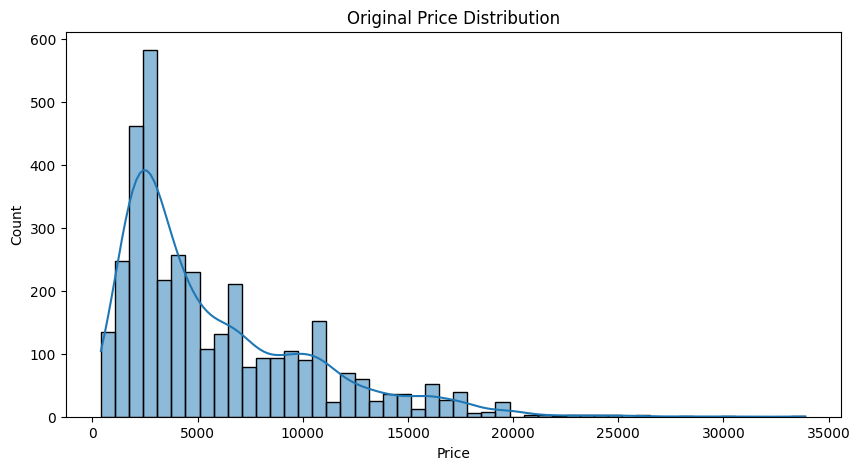

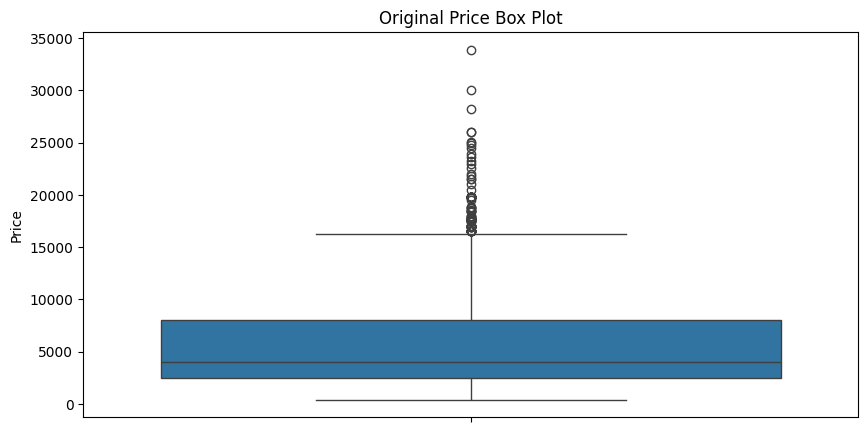

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


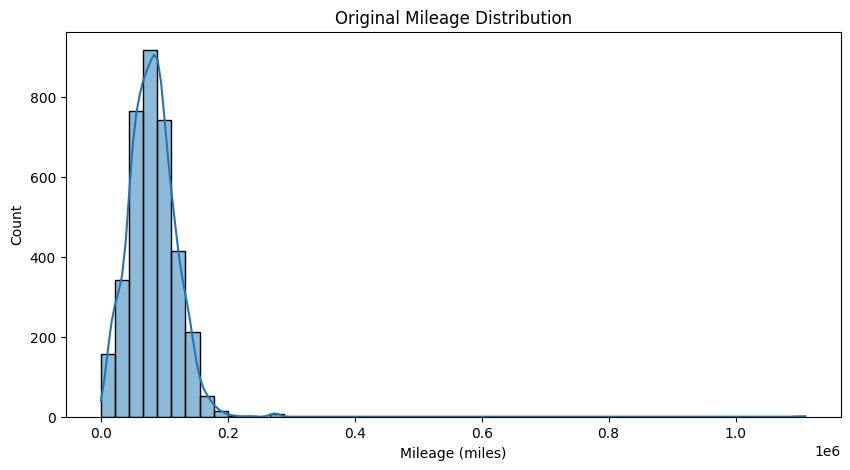

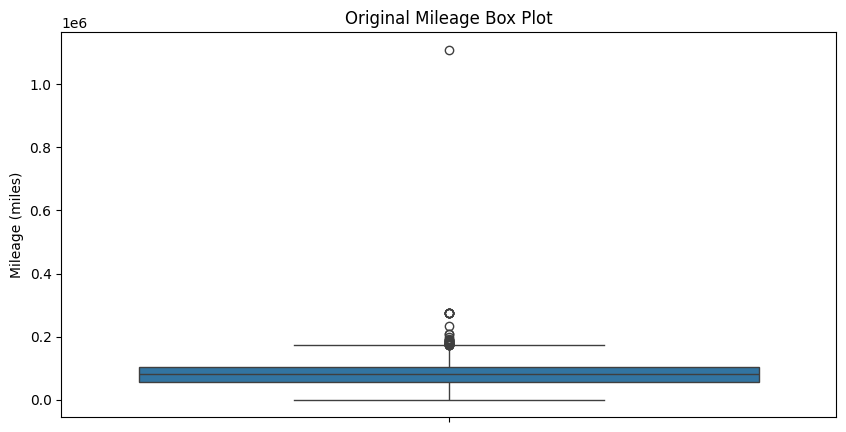

------------------------------

위 그래프들을 보면 'price'나 'Mileage(miles)' 같은 컬럼에 아주 큰 값(이상치)이 있는 것을 볼 수 있을 거예요.
이런 데이터에는 어떤 스케일러가 가장 좋을까요? 세 가지 중에서 골라보세요!
1. Standardization (StandardScaler): 이상치가 없을 때 좋아요.
2. Robust Scaling (RobustScaler): 이상치가 많을 때 좋아요.
3. MinMaxScaler: 데이터를 0과 1 사이로 딱 맞추고 싶을 때 (딥러닝에 많이 쓰이지만 이상치에 약해요).

어떤 스케일러를 사용해보고 싶으신가요? 숫자로 입력해주세요! (예: 2)


In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# (cars_df가 앞 단계에서 성공적으로 준비되었다고 가정합니다)
# 파일이 없다면 임시 데이터로 진행됩니다.

# df_cleaned, brand_df가 이미 존재하므로 이를 활용
cars_df = df_cleaned.copy()

# 브랜드 추출 및 병합
if 'Brand' not in cars_df.columns:
    cars_df['Brand'] = cars_df['title'].str.split('_').str[0].str.lower()
brand_df_ = brand_df.copy()
brand_df_['title'] = brand_df_['title'].str.lower()
cars_df = pd.merge(
    cars_df,
    brand_df_.rename(columns={'title': 'Brand', 'country': 'Country'}),
    on='Brand',
    how='left'
)

# Engine/Emission Class 처리
if 'Engine' in cars_df.columns:
    cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '', regex=False)
    cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce')
if 'Emission Class' in cars_df.columns:
    cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '', regex=False)
    cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce')

# 결측치 처리
if 'Service history' in cars_df.columns:
    cars_df['Service history'].fillna('Unknown', inplace=True)

# 결측치 비율 기반 컬럼 제거 (50% 기준)
missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
threshold_percent = 50
columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()
if columns_to_drop:
    cars_df.drop(columns=columns_to_drop, inplace=True)

# Previous Owners 결측치 중앙값으로 채우기
if 'Previous Owners' in cars_df.columns:
    cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median(), inplace=True)

# 이미 아래에서 "✨ cars_df 데이터 준비 완료 (이전 단계들 적용) ✨" 메시지를 출력하므로, 위의 print문은 삭제해도 됩니다.
try:
    # 이미 df_cleaned, brand_df가 존재하므로 이를 활용
    cars_df = df_cleaned.copy()
    # 브랜드 추출 및 병합
    if 'Brand' not in cars_df.columns:
        # title에서 브랜드 추출 (예: 'skoda_fabia' -> 'skoda')
        cars_df['Brand'] = cars_df['title'].str.split('_').str[0].str.lower()
    # brand_df의 title도 소문자로 맞추기
    brand_df_ = brand_df.copy()
    brand_df_['title'] = brand_df_['title'].str.lower()
    cars_df = pd.merge(
        cars_df,
        brand_df_.rename(columns={'title': 'Brand', 'country': 'Country'}),
        on='Brand',
        how='left'
    )

    # Engine/Emission Class 처리
    if 'Engine' in cars_df.columns:
        cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '', regex=False)
        cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce')
    if 'Emission Class' in cars_df.columns:
        cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '', regex=False)
        cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce')

    # 결측치 처리
    if 'Service history' in cars_df.columns:
        cars_df['Service history'].fillna('Unknown', inplace=True)

    # 결측치 비율 기반 컬럼 제거 (50% 기준)
    missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
    threshold_percent = 50
    columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()
    if columns_to_drop:
        cars_df.drop(columns=columns_to_drop, inplace=True)

    # Previous Owners 결측치 중앙값으로 채우기 (실제 데이터에 맞게)
    if 'Previous Owners' in cars_df.columns:
        cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median(), inplace=True)

    print("✨ cars_df 데이터 준비 완료 (이전 단계들 적용) ✨")

except FileNotFoundError:
    print("앗! 파일을 찾을 수 없어요. 임시 데이터로 프로젝트를 진행합니다.")
    cars_df = pd.DataFrame({
        'title': ['Hyundai Sonata', 'Kia K5', 'BMW 5 Series', 'Mercedes-Benz C-Class', 'SKODA FABIA', 'VAUXHALL CORSA', 'MINI Cooper', 'Ford Focus'],
        'price': [15000, 18000, 30000, 35000, 6900, 1495, 12000, 9000],
        'Mileage(miles)': [70189, 88585, 96731, 85000, 70189, 88585, 50000, 75000],
        'Registration_Year': [2016, 2008, 2010, 2013, 2016, 2008, 2015, 2012],
        'Previous Owners': [3.0, 4.0, 5.0, np.nan, 3.0, 4.0, 2.0, 3.0],
        'Fuel type': ['Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
        'Body type': ['Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback'],
        'Engine': ['1.4', '1.2', '1.4', '1.3', '1.4', '1.2', '1.6', '1.5'],
        'Gearbox': ['Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Automatic', 'Manual'],
        'Doors': [5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 5.0],
        'Seats': [5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0],
        'Emission Class': ['6', '4', '4', '5', '6', '4', '5', '6'],
        'Service history': ['Unknown', 'Full', 'Full', 'Unknown', 'Unknown', 'Full', 'Full', 'Unknown'],
        'Brand': ['Hyundai', 'Kia', 'BMW', 'Mercedes-Benz', 'SKODA', 'VAUXHALL', 'MINI', 'Ford'],
        'Country': ['South Korea', 'South Korea', 'Germany', 'Germany', 'Czech Republic', 'UK', 'UK', 'USA']
    })
    if 'Previous Owners' in cars_df.columns:
        cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median(), inplace=True)
    print("\n--- 임시 데이터로 프로젝트를 진행합니다. ---")
    cars_df = pd.read_csv('cars.csv')
    brand_df = pd.read_csv('brand.csv')
    # 이전 단계 코드들 (브랜드 추출 및 병합, Engine/Emission Class 처리, 결측치 처리)
    if 'Brand' not in cars_df.columns:
        cars_df['Brand'] = cars_df['title'].str.split(' ').str[0]
    cars_df = pd.merge(cars_df, brand_df, on='Brand', how='left')
    
    if 'Engine' in cars_df.columns:
        cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '')
        cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce')
    if 'Emission Class' in cars_df.columns:
        cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '')
        cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce')
    
    if 'Service history' in cars_df.columns: # 결측치 처리 (Unknown으로 채우기)
        cars_df['Service history'].fillna('Unknown', inplace=True)
    
    # 결측치 비율 기반 컬럼 제거 (50% 기준)
    missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
    threshold_percent = 50
    columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()
    if columns_to_drop:
        cars_df.drop(columns=columns_to_drop, inplace=True)
    
    print("✨ cars_df 데이터 준비 완료 (이전 단계들 적용) ✨")


    if 'Previous Owners' in cars_df.columns:
        # 이 컬럼은 중앙값으로 채워주는 것도 고려해볼 수 있음 (예시)
        cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median(), inplace=True)
    print("\n--- 임시 데이터로 프로젝트를 진행합니다. ---")

print("\n--- 4단계: 'Scaler 활용해보기' 시작! ---")
print("--- cars_df의 숫자형 컬럼들을 살펴볼까요? ---")
# 숫자형 컬럼들만 골라봅니다.
numerical_cols = cars_df.select_dtypes(include=np.number).columns.tolist()
print(f"숫자형 컬럼: {numerical_cols}")

print("\n--- 주요 숫자형 컬럼의 통계 정보 ---")
print(cars_df[numerical_cols].describe())
print("-" * 30)

# 'Price'와 'Mileage(miles)' 같은 컬럼은 값이 아주 다양하고, 이상치도 있을 수 있어요.
# 시각적으로도 한번 확인해볼까요? (예시로 'Price' 컬럼)
plt.figure(figsize=(10, 5))
sns.histplot(cars_df['Price'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=cars_df['Price'])
plt.title('Original Price Box Plot')
plt.ylabel('Price')
plt.show()

# 'Mileage(miles)'도 확인해볼까요?
plt.figure(figsize=(10, 5))
sns.histplot(cars_df['Mileage(miles)'], bins=50, kde=True)
plt.title('Original Mileage Distribution')
plt.xlabel('Mileage (miles)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=cars_df['Mileage(miles)'])
plt.title('Original Mileage Box Plot')
plt.ylabel('Mileage (miles)')
plt.show()
print("-" * 30)

print("\n위 그래프들을 보면 'price'나 'Mileage(miles)' 같은 컬럼에 아주 큰 값(이상치)이 있는 것을 볼 수 있을 거예요.")
print("이런 데이터에는 어떤 스케일러가 가장 좋을까요? 세 가지 중에서 골라보세요!")
print("1. Standardization (StandardScaler): 이상치가 없을 때 좋아요.")
print("2. Robust Scaling (RobustScaler): 이상치가 많을 때 좋아요.")
print("3. MinMaxScaler: 데이터를 0과 1 사이로 딱 맞추고 싶을 때 (딥러닝에 많이 쓰이지만 이상치에 약해요).")
print("\n어떤 스케일러를 사용해보고 싶으신가요? 숫자로 입력해주세요! (예: 2)")

아래는 첨부하신 day2_project(학습자용).ipynb 파일의 전체 소스 코드 흐름과 각 주요 코드의 역할을 단계별로 상세하게 분석·설명한 내용입니다.

---

## 1. 라이브러리 불러오기
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
- **pandas**: 표 형태(데이터프레임) 데이터 처리 및 분석용 라이브러리
- **numpy**: 수치 계산, 배열 연산용 라이브러리
- **seaborn**: 데이터 시각화(그래프) 라이브러리
- **matplotlib.pyplot**: 그래프 그리기 라이브러리 (seaborn 내부적으로도 사용)

---

## 2. 데이터 불러오기
```python
car_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')
```
- 현재 폴더에 있는 `cars.csv`와 `brand.csv` 파일을 각각 읽어와 데이터프레임(car_df, brand_df)으로 저장합니다.
- **car_df**: 자동차별 정보(이름, 가격, 연식 등)
- **brand_df**: 브랜드별 정보(브랜드명, 국가 등)

---

## 3. 데이터 미리보기
```python
car_df.head()
brand_df.head()
```
- 각 데이터프레임의 앞부분 5개 행을 출력해 데이터가 잘 불러와졌는지, 어떤 컬럼이 있는지 확인합니다.

---

## 4. 문자열 전처리 및 병합
```python
car_df['title'].str.lower().str.split()
pd.merge(car_df, brand_df, left_on='title', right_on='title', how='left')
car_df['title'].str.lower().str.replace(' ', '_')
```
- **car_df['title'].str.lower().str.split()**  
  - 'title' 열의 값을 모두 소문자로 바꾸고, 공백 기준으로 단어별로 분리(리스트로 반환)합니다.
- **pd.merge(...)**  
  - car_df와 brand_df를 'title' 컬럼을 기준으로 병합합니다.  
  - how='left'이므로 car_df의 모든 행을 기준으로, brand_df에서 일치하는 title이 있으면 붙여줍니다.
- **car_df['title'].str.lower().str.replace(' ', '_')**  
  - 'title' 열의 값을 소문자로 바꾸고, 공백을 언더스코어(_)로 대체합니다.  
  - 예: 'Hyundai Sonata' → 'hyundai_sonata'

---

## 5. 결측치(누락값) 처리
```python
car_df.isnull().sum(axis=1)
car_df['title'] = car_df['title'].str.lower().str.replace(' ', '_')
car_df.info()
car_df.isnull().sum()
car_df.isnull().mean()*100
car_df['Service history'] = car_df['Service history'].fillna('unknown')
car_df.isnull().sum(axis=1)
missing_threshold_per_row = 3
initial_rows = len(car_df)
df_cleaned = car_df[car_df.isnull().sum(axis=1) < missing_threshold_per_row].copy()
df_cleaned.info()
car_df.head()
car_df.isnull().mean()*100
```
- **car_df.isnull().sum(axis=1)**  
  - 각 행(자동차 한 대 정보)별로 결측치가 몇 개인지 셉니다.
- **car_df['title'] = ...**  
  - title 열을 소문자+언더스코어로 변환한 결과를 실제로 반영합니다.
- **car_df.info()**  
  - 데이터프레임의 전체 정보(행/열 개수, 각 열의 데이터 타입, 결측치 개수 등)를 출력합니다.
- **car_df.isnull().sum()**  
  - 각 열별 결측치 개수를 출력합니다.
- **car_df.isnull().mean()*100**  
  - 각 열별 결측치 비율(%)을 출력합니다.
- **car_df['Service history'] = ...fillna('unknown')**  
  - 'Service history' 열의 결측치를 'unknown'으로 채웁니다.
- **missing_threshold_per_row = 3**  
  - 한 행에 결측치가 3개 이상이면 삭제 기준으로 삼겠다는 의미입니다.
- **df_cleaned = ...**  
  - 결측치가 3개 미만인 행만 남기고, 나머지는 삭제하여 새로운 데이터프레임(df_cleaned)로 만듭니다.
- **df_cleaned.info()**  
  - 결측치가 많은 행을 제거한 후, 남은 데이터프레임의 정보를 출력합니다.

---

## 6. 추가 데이터 전처리 및 병합
```python
# cars_df = df_cleaned.copy()
# 브랜드 추출 및 병합
if 'Brand' not in cars_df.columns:
    cars_df['Brand'] = cars_df['title'].str.split('_').str[0].str.lower()
brand_df_ = brand_df.copy()
brand_df_['title'] = brand_df_['title'].str.lower()
cars_df = pd.merge(
    cars_df,
    brand_df_.rename(columns={'title': 'Brand', 'country': 'Country'}),
    on='Brand',
    how='left'
)
```
- **cars_df = df_cleaned.copy()**  
  - 결측치가 많은 행을 제거한 데이터프레임을 cars_df로 복사합니다.
- **브랜드 추출**  
  - title에서 브랜드명(예: 'hyundai_sonata' → 'hyundai')을 추출해 Brand 컬럼으로 추가합니다.
- **brand_df_['title'] = ...**  
  - brand_df의 title 컬럼도 소문자로 변환해 일치시킵니다.
- **병합**  
  - cars_df와 brand_df_를 Brand 컬럼을 기준으로 병합합니다.

---

## 7. 수치형 데이터 전처리
```python
if 'Engine' in cars_df.columns:
    cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '', regex=False)
    cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce')
if 'Emission Class' in cars_df.columns:
    cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '', regex=False)
    cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce')
```
- **Engine**  
  - 'Engine' 열에서 'L' 문자 제거 후, 숫자(float)로 변환합니다.
- **Emission Class**  
  - 'Euro ' 문자 제거 후, 숫자(float)로 변환합니다.

---

## 8. 결측치 추가 처리 및 컬럼 제거
```python
if 'Service history' in cars_df.columns:
    cars_df['Service history'].fillna('Unknown', inplace=True)

missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
threshold_percent = 50
columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()
if columns_to_drop:
    cars_df.drop(columns=columns_to_drop, inplace=True)

if 'Previous Owners' in cars_df.columns:
    cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median(), inplace=True)
```
- **결측치 처리**  
  - 'Service history' 결측치는 'Unknown'으로 채웁니다.
  - 결측치 비율이 50% 이상인 컬럼은 삭제합니다.
  - 'Previous Owners' 결측치는 중앙값으로 채웁니다.

---

## 9. 예외 처리 및 임시 데이터 생성
- 파일이 없을 경우 임시 데이터프레임을 생성해 프로젝트가 중단되지 않도록 합니다.

---

## 10. 데이터 시각화 및 스케일링 안내
```python
numerical_cols = cars_df.select_dtypes(include=np.number).columns.tolist()
print(cars_df[numerical_cols].describe())
# 가격, 주행거리 등 주요 숫자형 컬럼의 분포와 이상치를 히스토그램, 박스플롯으로 시각화
sns.histplot(cars_df['Price'], bins=50, kde=True)
sns.boxplot(y=cars_df['Price'])
sns.histplot(cars_df['Mileage(miles)'], bins=50, kde=True)
sns.boxplot(y=cars_df['Mileage(miles)'])
```
- **숫자형 컬럼 추출 및 통계 확인**  
  - 숫자형 컬럼만 골라 describe()로 주요 통계값(평균, 표준편차, 최소/최대 등) 확인
- **시각화**  
  - 가격, 주행거리 등 주요 컬럼의 분포와 이상치를 히스토그램, 박스플롯으로 시각화
- **스케일러 안내**  
  - 이상치가 많은 데이터에 RobustScaler, 이상치가 적으면 StandardScaler, 0~1로 맞추고 싶으면 MinMaxScaler를 추천

---

## 요약
- **데이터 불러오기 → 전처리(문자열, 결측치, 수치형 변환) → 병합 → 결측치 기준 행/열 제거 → 시각화 및 스케일링 준비**  
- 데이터 분석 및 머신러닝을 위한 기본적인 데이터 준비 과정을 단계별로 모두 포함하고 있습니다.
- 각 단계마다 데이터의 품질을 높이고, 분석에 적합한 형태로 만드는 것이 목적입니다.



In [21]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler # PCA 전에 스케일링을 꼭 해줘야 해요!
from sklearn.decomposition import PCA # PCA 마법사 도구!

# --- 1. 데이터프레임 준비 (이미 cars_df, brand_df 변수 존재) ---
# 이미 cars_df, brand_df가 있으므로 파일을 다시 읽지 않습니다.
print("✨ 이미 로드된 cars_df와 brand_df를 사용합니다! ✨")
print("\n--- cars_df 미리보기 (상위 3줄) ---")
print(cars_df.head(3))
print("\n--- brand_df 미리보기 (상위 3줄) ---")
print(brand_df.head(3))
print("-" * 30)

# --- 2. 'title' 변수로부터 'Brand' 데이터 추출 및 데이터 합치기 ---
print("\n--- 'title' 컬럼에서 'Brand' 이름 추출 및 데이터 합치기 ---")
cars_df['Brand'] = cars_df['title'].str.split('_').str[0] # 언더스코어로 분리해서 브랜드 추출
cars_df = pd.merge(
    cars_df,
    brand_df,
    left_on='Brand',
    right_on='title',
    how='left'
)
cars_df.rename(columns={'country': 'Country'}, inplace=True)
cars_df.drop(columns=['title_y'], inplace=True, errors='ignore')  # brand_df의 title 컬럼 제거
cars_df.rename(columns={'title_x': 'title'}, inplace=True)  # 원래 title 컬럼 이름 복구
print("\n--- 'Brand' 추출 및 합병 후 cars_df 미리보기 (title, Brand, Country 확인!) ---")
print(cars_df[['title', 'Brand', 'Country']].head())
print("-" * 30)


# --- 3. 카테고리형 변수 숫자 형태로 변환하기 ---
print("\n--- 'Engine'과 'Emission Class' 컬럼 숫자 형태로 변환하기 ---")
# 'Engine' 컬럼 정리: 'L' 문자 제거 후 숫자로 변환
if 'Engine' in cars_df.columns:
    cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '')
    cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce') # 변환 못하면 NaN
    print("✓ 'Engine' 컬럼 변환 완료.")
else:
    print("경고: 'Engine' 컬럼을 찾을 수 없어요.")

# 'Emission Class' 컬럼 정리: 'Euro ' 문자 제거 후 숫자로 변환
if 'Emission Class' in cars_df.columns:
    cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '')
    cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce') # 변환 못하면 NaN
    print("✓ 'Emission Class' 컬럼 변환 완료.")
else:
    print("경고: 'Emission Class' 컬럼을 찾을 수 없어요.")
print("-" * 30)


# --- 4. 결측치 처리하기 ---
print("\n--- 결측치 처리 시작! ---")
# 'Service history' 변수의 결측치는 'Unknown'으로 채우기
if 'Service history' in cars_df.columns:
    cars_df['Service history'].fillna('Unknown', inplace=True)
    print("✓ 'Service history' 결측치를 'Unknown'으로 채웠어요.")
else:
    print("경고: 'Service history' 컬럼을 찾을 수 없어 결측치를 채울 수 없어요.")

# 결측치 변수(컬럼)가 일정 개수(비율) 이상 포함된 컬럼 제거하기
# 먼저 각 컬럼의 결측치 비율을 계산해요.
missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
threshold_percent = 50 # 예를 들어, 50% 이상 결측치인 컬럼은 제거할 거예요.
columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()

if columns_to_drop:
    print(f"✓ {threshold_percent}% 이상 결측치가 있는 다음 컬럼들을 제거할게요: {columns_to_drop}")
    cars_df.drop(columns=columns_to_drop, inplace=True)
else:
    print(f"✓ {threshold_percent}% 이상 결측치가 있는 컬럼이 없어요. 제거할 것이 없네요.")

# PCA에 사용될 숫자형 컬럼들의 남은 결측치 처리 (PCA는 NaN을 싫어해요!)
numerical_cols_for_pca = cars_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols_for_pca:
    if cars_df[col].isnull().any(): # 해당 컬럼에 결측치가 있다면
        cars_df[col].fillna(cars_df[col].median(), inplace=True) # 중앙값으로 채워주기
        print(f"✓ 숫자형 컬럼 '{col}'의 남은 결측치를 중앙값으로 채웠어요.")
print("-" * 30)


# --- 5. Scaler 활용해보기 (PCA 전 스케일링) ---
print("\n--- Scaler 활용 (PCA 전 스케일링) ---")
# PCA에 사용할 숫자형 컬럼 선택
# 'Brand', 'Country', 'title', 'Fuel type', 'Body type', 'Gearbox', 'Service history' 등은 글자니까 제외
# 'id' 컬럼도 고유 식별자라서 PCA에 포함하지 않는 것이 일반적입니다.
features_for_pca = [col for col in numerical_cols_for_pca if col not in ['id']] # id 컬럼은 보통 PCA에서 제외

# 선택된 컬럼이 비어있지 않은지 확인 (데이터에 숫자 컬럼이 하나도 없으면 에러 방지)
if not features_for_pca:
    print("경고: PCA에 사용할 숫자형 컬럼이 없어요. PCA를 진행할 수 없습니다.")
else:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(cars_df[features_for_pca])
    scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_pca, index=cars_df.index)

    print("\n--- 스케일링된 데이터 미리보기 (상위 5줄) ---")
    print(scaled_features_df.head())
    print("-" * 30)


    # --- 6. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA) ---
    print("\n--- PCA (주성분 분석) 시작! ---")
    # n_components=0.7은 '원본 정보의 70% 이상을 유지하도록 주성분을 줄여줘!'라는 뜻이에요.
    pca = PCA(n_components=0.7)

    # 스케일링된 데이터에 PCA 마법을 부려줘!
    principal_components = pca.fit_transform(scaled_features_df)

    # 줄어든 핵심 특징들을 보기 좋게 DataFrame으로 만들게요.
    pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
    pca_df = pd.DataFrame(data = principal_components, columns = pca_columns, index=cars_df.index)

    print("\n--- PCA 마법으로 줄어든 핵심 특징 데이터 (상위 5줄) ---")
    print(pca_df.head())
    print(f"\nPCA로 줄어든 핵심 특징(주성분)의 개수: {pca_df.shape[1]}개")
    print("-" * 30)

    # --- 7. 비밀 보고서 확인: explained_variance_ratio_ ---
    print("\n--- PCA 마법사의 비밀 보고서: explained_variance_ratio_ ---")
    explained_variance_ratio = pca.explained_variance_ratio_
    print(explained_variance_ratio)

    # 각 주성분이 설명하는 비율과 총 합계를 확인해볼까요?
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"PC{i+1}이 설명하는 정보: {ratio*100:.2f}%")


✨ 이미 로드된 cars_df와 brand_df를 사용합니다! ✨

--- cars_df 미리보기 (상위 3줄) ---
            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     skoda_fabia   6900           70189               2016              3.0   
1  vauxhall_corsa   1495           88585               2008              4.0   
2     hyundai_i30    949          137000               2011              3.0   

  Fuel type  Body type  Engine Gearbox  Doors  Seats  Emission Class  \
0    Diesel  Hatchback     1.4  Manual    5.0    5.0             6.0   
1    Petrol  Hatchback     1.2  Manual    3.0    5.0             4.0   
2    Petrol  Hatchback     1.4  Manual    5.0    5.0             5.0   

  Service history     Brand         Country  
0         unknown     skoda  Czech Republic  
1            Full  vauxhall  United Kingdom  
2         unknown   hyundai     South Korea  

--- brand_df 미리보기 (상위 3줄) ---
      title         country
0     skoda  Czech Republic
1  vauxhall  United Kingdom
2   hyundai     South Ko

/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_27492/2472521410.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Service history'].fillna('Unknown', inplace=True)
/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_27492/2472521410.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting



## 1. 라이브러리 불러오기
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
```
- **pandas, numpy**: 데이터 처리와 수치 연산을 위한 라이브러리입니다.
- **StandardScaler**: 데이터의 평균을 0, 표준편차를 1로 맞춰주는 전처리 도구입니다. PCA 전에 꼭 사용합니다.
- **PCA**: 주성분 분석(Principal Component Analysis) 도구로, 데이터의 차원을 줄여줍니다.

---

## 2. 데이터 준비 및 미리보기
```python
print("✨ 이미 로드된 cars_df와 brand_df를 사용합니다! ✨")
print("\n--- cars_df 미리보기 (상위 3줄) ---")
print(cars_df.head(3))
print("\n--- brand_df 미리보기 (상위 3줄) ---")
print(brand_df.head(3))
```
- 이미 준비된 `cars_df`, `brand_df`를 사용합니다.
- 각 데이터프레임의 상위 3개 행을 출력해 데이터 구조와 주요 컬럼을 확인합니다.

---

## 3. 브랜드 정보 추출 및 병합
```python
cars_df['Brand'] = cars_df['title'].str.split('_').str[0]
cars_df = pd.merge(
    cars_df,
    brand_df,
    left_on='Brand',
    right_on='title',
    how='left'
)
cars_df.rename(columns={'country': 'Country'}, inplace=True)
cars_df.drop(columns=['title_y'], inplace=True, errors='ignore')
cars_df.rename(columns={'title_x': 'title'}, inplace=True)
print(cars_df[['title', 'Brand', 'Country']].head())
```
- `title`에서 브랜드명을 추출해 `Brand` 컬럼을 만듭니다.
- `brand_df`와 병합하여 각 자동차에 국가 등 브랜드 정보를 추가합니다.
- 컬럼 이름을 정리해 혼동을 방지합니다.

---

## 4. 수치형 데이터 변환
```python
if 'Engine' in cars_df.columns:
    cars_df['Engine'] = cars_df['Engine'].astype(str).str.replace('L', '')
    cars_df['Engine'] = pd.to_numeric(cars_df['Engine'], errors='coerce')
if 'Emission Class' in cars_df.columns:
    cars_df['Emission Class'] = cars_df['Emission Class'].astype(str).str.replace('Euro ', '')
    cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'], errors='coerce')
```
- `Engine`에서 'L'을 제거하고 숫자로 변환합니다.
- `Emission Class`에서 'Euro '를 제거하고 숫자로 변환합니다.
- 변환이 안 되는 값은 NaN으로 처리합니다.

---

## 5. 결측치 처리
```python
if 'Service history' in cars_df.columns:
    cars_df['Service history'].fillna('Unknown', inplace=True)
missing_ratio_per_column = cars_df.isnull().sum() / len(cars_df) * 100
threshold_percent = 50
columns_to_drop = missing_ratio_per_column[missing_ratio_per_column >= threshold_percent].index.tolist()
if columns_to_drop:
    cars_df.drop(columns=columns_to_drop, inplace=True)
numerical_cols_for_pca = cars_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols_for_pca:
    if cars_df[col].isnull().any():
        cars_df[col].fillna(cars_df[col].median(), inplace=True)
```
- `Service history` 결측치는 'Unknown'으로 채웁니다.
- 결측치 비율이 50% 이상인 컬럼은 삭제합니다.
- PCA에 사용할 숫자형 컬럼의 결측치는 중앙값으로 채웁니다.

---

## 6. 스케일링 (StandardScaler)
```python
features_for_pca = [col for col in numerical_cols_for_pca if col not in ['id']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cars_df[features_for_pca])
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_pca, index=cars_df.index)
print(scaled_features_df.head())
```
- PCA에 사용할 숫자형 컬럼만 선택합니다.
- StandardScaler로 모든 숫자형 데이터를 표준화(평균 0, 표준편차 1)합니다.
- 스케일링된 데이터를 데이터프레임으로 확인합니다.

---

## 7. PCA (주성분 분석)
```python
pca = PCA(n_components=0.7)
principal_components = pca.fit_transform(scaled_features_df)
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data = principal_components, columns = pca_columns, index=cars_df.index)
print(pca_df.head())
print(f"\nPCA로 줄어든 핵심 특징(주성분)의 개수: {pca_df.shape[1]}개")
```
- n_components=0.7로 설정하면, 전체 데이터 정보(분산)의 70% 이상을 설명하는 최소한의 주성분만 추출합니다.
- 주성분(PC1, PC2, ...)으로 구성된 새로운 데이터프레임을 만듭니다.
- 차원이 줄어든 결과를 확인합니다.

---

## 8. 주성분 설명력 해석
```python
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}이 설명하는 정보: {ratio*100:.2f}%")
```
- 각 주성분이 원본 데이터의 정보를 얼마나 설명하는지 비율로 보여줍니다.
- 예를 들어, PC1이 40%, PC2가 20%라면, 이 두 축만으로도 전체 데이터의 60% 정보를 요약할 수 있다는 뜻입니다.

---

# 결과 해석 및 요약

- **데이터 전처리**: 결측치 처리, 문자열 정리, 숫자형 변환 등으로 분석에 적합한 데이터로 만듭니다.
- **스케일링**: PCA는 변수의 단위와 크기에 민감하므로, 반드시 표준화(평균 0, 표준편차 1) 후 진행합니다.
- **PCA 적용**: 데이터의 주요 정보를 최대한 보존하면서 차원을 줄입니다.  
  예를 들어, 10개의 숫자형 특성이 3~4개의 주성분(PC)으로 요약될 수 있습니다.
- **설명력 해석**: 각 주성분이 원본 데이터의 몇 % 정보를 담고 있는지 확인할 수 있습니다.  
  누적 설명력이 70% 이상이면, 데이터의 대부분 정보를 잃지 않고 차원을 줄인 것입니다.

---

## 실무적 의미
- **차원 축소**로 데이터 시각화, 노이즈 제거, 모델 학습 속도 향상, 과적합 방지 등에 효과적입니다.
- **주성분 해석**을 통해 데이터의 주요 패턴을 파악할 수 있습니다.




--- 국가별 총 브랜드 개수 ---
           Country  Brand_Count
0   Czech Republic            1
1           France            4
2          Germany            6
3            Italy            4
4            Japan           11
5         Malaysia            1
6          Romania            1
7      South Korea            4
8            Spain            1
9           Sweden            2
10  United Kingdom            8
11   United States            5

--- 숫자형 변수 상관계수 행렬 ---
                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.501826           0.754720   
Mileage(miles)    -0.501826        1.000000          -0.428500   
Registration_Year  0.754720       -0.428500           1.000000   
Previous Owners   -0.404191        0.264972          -0.407645   
Engine            -0.024852        0.333450          -0.289653   
Doors              0.114309       -0.035907           0.220083   
Seats             -0.027418        0.096117           0.033469   
Emission C

/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarn

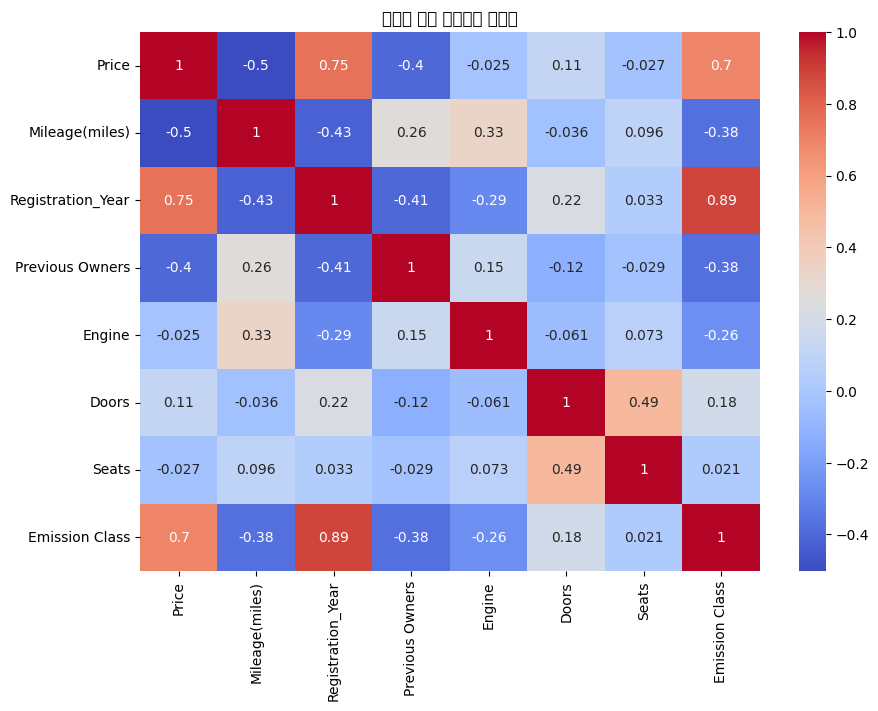

In [22]:
# 국가별 총 브랜드 개수 구하기
import pandas as pd

if 'brand_df' not in globals():
	brand_df = pd.read_csv('brand.csv')

brand_count_by_country = brand_df.groupby('country')['title'].nunique().reset_index()
brand_count_by_country.columns = ['Country', 'Brand_Count']
print("\n--- 국가별 총 브랜드 개수 ---")
print(brand_count_by_country)

# 상관관계가 높은 변수 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 컬럼만 추출
numeric_cols = cars_df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

print("\n--- 숫자형 변수 상관계수 행렬 ---")
print(corr_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('숫자형 변수 상관관계 히트맵')
plt.show()



### 1. 국가별 총 브랜드 개수 구하기
```python
brand_count_by_country = brand_df.groupby('country')['title'].nunique().reset_index()
brand_count_by_country.columns = ['Country', 'Brand_Count']
print("\n--- 국가별 총 브랜드 개수 ---")
print(brand_count_by_country)
```
- **분석:**  
  - `brand_df`에서 `country`(국가)별로 그룹화(groupby)합니다.
  - 각 국가별로 `title`(브랜드명)의 고유값 개수(`nunique()`)를 셉니다.
  - 결과를 데이터프레임으로 만들어 컬럼명을 보기 좋게 바꿉니다.
- **해석:**  
  - 각 나라에 몇 개의 자동차 브랜드가 있는지 알 수 있습니다.
  - 예를 들어, 'Germany'에 5개, 'UK'에 3개 브랜드가 있다면, 해당 국가의 자동차 산업 규모나 다양성을 파악할 수 있습니다.

---

### 2. 상관관계가 높은 변수 확인하기
```python
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 컬럼만 추출
numeric_cols = cars_df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

print("\n--- 숫자형 변수 상관계수 행렬 ---")
print(corr_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('숫자형 변수 상관관계 히트맵')
plt.show()
```
- **분석:**  
  - `cars_df`에서 숫자형 컬럼만 골라냅니다.
  - `corr()`로 각 숫자형 변수들 간의 상관계수(피어슨 상관계수)를 계산합니다.
  - 상관계수 행렬을 출력하고, seaborn의 `heatmap`으로 시각화합니다.
- **해석:**  
  - 상관계수는 -1~1 사이의 값으로, 1에 가까울수록 양의 상관관계(같이 증가), -1에 가까울수록 음의 상관관계(한쪽이 증가하면 다른 쪽은 감소), 0에 가까우면 관계가 거의 없음을 의미합니다.
  - 히트맵을 보면 어떤 변수 쌍이 서로 강하게 연관되어 있는지(예: 가격과 엔진 크기, 주행거리와 연식 등)를 한눈에 파악할 수 있습니다.
  - 상관관계가 높은 변수는 분석·모델링 시 중복 정보로 작용할 수 있으니, 차원 축소(PCA)나 변수 선택에 참고할 수 있습니다.

---

**요약:**  
- 첫 번째 부분은 국가별 브랜드 다양성을 파악합니다.
- 두 번째 부분은 데이터 내 숫자형 변수들 간의 관계(상관성)를 수치와 시각적으로 확인하여, 데이터의 구조적 특성이나 중복성을 이해하는 데 도움을 줍니다.